In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising_Data.csv')

In [3]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


# Análise Exploratória

In [4]:
df.shape # Números de linhas e colunas da base

(300, 7)

In [5]:
df.info() # Informações da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [6]:
df.isna().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

# Renomear Colunas

In [7]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [8]:
df.columns = ['TV', 'Outdoors', 'Google Ads', 'Mídias Sociais',
       'Marketing de Influência', 'Marketing de Afiliados', 'Produto Vendido']

In [9]:
df.head()

,TV,Outdoors,Google Ads,Mídias Sociais,Marketing de Influência,Marketing de Afiliados,Produto Vendido
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


# Maior Faturamento Registrado

In [10]:
df['Produto Vendido'].max() # Maior Faturamento

12227.0

In [11]:
df[df['Produto Vendido'] == 12227.0] # Filtrando A Coluna com base o maior faturamento para ver como foi o investimento nas publicidades
# Foram todos Valores a cima de 700

,TV,Outdoors,Google Ads,Mídias Sociais,Marketing de Influência,Marketing de Afiliados,Produto Vendido
11,787.33,947.73,884.15,992.3,871.55,742.36,12227.0


<Axes: >

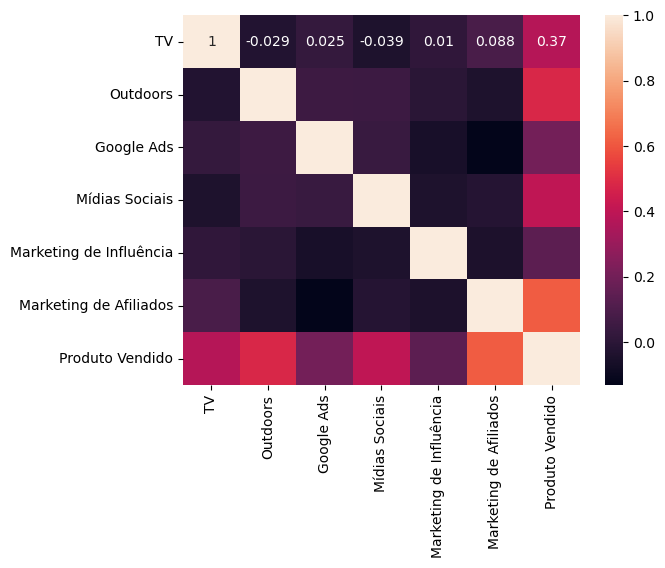

In [12]:
sns.heatmap(df.corr(), annot=True) # Correlação de Pearson

# Assimetria da base

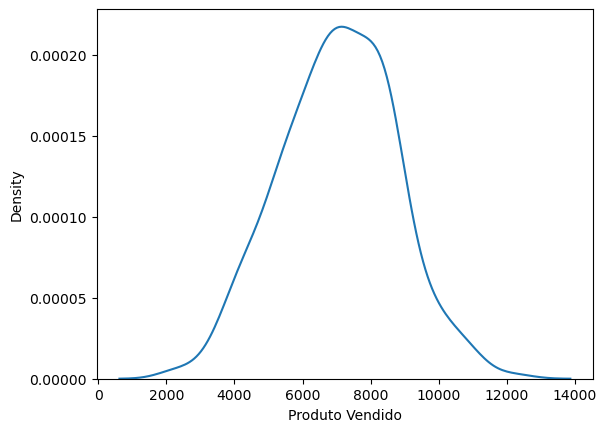

In [13]:
sns.kdeplot(df['Produto Vendido']); # Assimetria negativa

In [14]:
df['Produto Vendido'].skew() # Com o coeficiente menor que 1 

-0.04767595475005194

In [15]:
df['Produto Vendido'].median() # Mediana, separa a base em 50%. 50% da base tem valores maiores que 7051.0 e outros 50% é menor que 7051.0 

7051.0

# Com base a tabela podemos perceber que quanto mais apostar em publicidades maior será a venda de produto

In [16]:
bd_maior_que_mediana = df[(df['Produto Vendido'] >= 7051.0) & (df['Produto Vendido'] <= 12227.0)]
bd_maior_que_mediana.sort_values(by='Produto Vendido', ascending=False).style.background_gradient(cmap='Blues')
# bd_maior_que_mediana -> Comparando registros com produtos vendidos maior que 7051.0

,TV,Outdoors,Google Ads,Mídias Sociais,Marketing de Influência,Marketing de Afiliados,Produto Vendido
11,787.330000,947.730000,884.150000,992.300000,871.550000,742.360000,12227.000000
10,667.170000,577.850000,898.190000,970.280000,789.520000,852.990000,11210.000000
269,945.340000,825.890000,772.200000,677.430000,401.260000,837.180000,11062.000000
196,610.150000,995.320000,757.920000,622.360000,241.990000,910.610000,10841.000000
96,788.170000,825.420000,912.890000,235.030000,938.700000,907.570000,10763.000000
283,640.690000,966.630000,624.120000,948.970000,480.160000,651.310000,10655.000000
271,867.030000,842.620000,524.350000,861.160000,57.550000,833.930000,10585.000000
60,946.680000,429.450000,603.510000,910.230000,479.180000,902.260000,10543.000000
287,958.240000,771.170000,69.460000,868.580000,649.500000,773.380000,10387.000000
61,480.330000,386.610000,926.800000,901.980000,559.910000,949.150000,10223.000000


In [17]:
bd_maior_que_mediana['Produto Vendido'].mean() # Media

8396.1

In [18]:
bd_maior_que_mediana['Produto Vendido'].std() # Desvio-Padrão

981.9958087773978

In [19]:
bd_maior_que_mediana['Produto Vendido'].skew() # Coeficiente de assimetria

1.1337562461342048

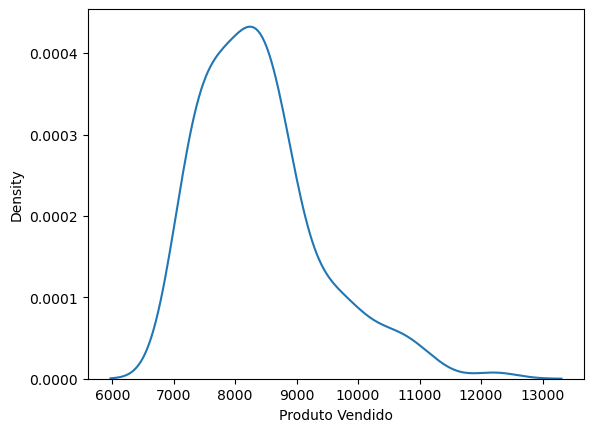

In [20]:
sns.kdeplot(bd_maior_que_mediana['Produto Vendido']); # Assimetria Positiva

# Quanto menos aposter em publicidades menor será o valor de produtos vendidos

In [21]:
Vendas_com_base_a_Mediana_menor= df[(df['Produto Vendido'] >= 2259.0) & (df['Produto Vendido'] <= 7051.0)]
Vendas_com_base_a_Mediana_menor.sort_values(by='Produto Vendido').style.background_gradient(cmap='Blues')

,TV,Outdoors,Google Ads,Mídias Sociais,Marketing de Influência,Marketing de Afiliados,Produto Vendido
145,1.040000,19.680000,900.710000,55.670000,379.030000,63.100000,2259.000000
281,480.670000,135.750000,82.660000,217.720000,217.900000,15.410000,2353.000000
99,283.570000,358.420000,213.660000,29.110000,622.680000,90.420000,3141.000000
176,149.780000,191.970000,558.870000,172.980000,412.790000,178.450000,3335.000000
259,529.950000,191.300000,89.940000,28.840000,507.410000,256.910000,3473.000000
36,165.260000,517.760000,172.030000,170.310000,169.940000,206.040000,3600.000000
7,762.090000,184.570000,176.610000,97.850000,116.670000,251.740000,3726.000000
246,224.050000,637.580000,183.570000,184.650000,264.440000,87.950000,3765.000000
228,347.010000,103.130000,275.400000,711.140000,23.830000,138.330000,3779.000000
185,36.040000,423.250000,166.910000,222.020000,598.430000,247.190000,3878.000000
